<a href="https://colab.research.google.com/github/ReynaraEzra/NLP-Tensorflow/blob/main/Project_NLP_Using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP Model Using Tensorflow**
## **Reynara Ezra Pratama**

In [1]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 262 µs (started: 2021-06-30 15:02:22 +00:00)


# **Get Data**

In [11]:
import pandas as pd

df = pd.read_csv('/content/emotion.txt', names=['sentence', 'emote'], sep=';')

time: 35.4 ms (started: 2021-06-30 15:06:41 +00:00)


# **Check Data**

In [12]:
df.head()

,sentence,emote
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


time: 20.1 ms (started: 2021-06-30 15:06:42 +00:00)


In [14]:
print('Number of Data:',len(df))

Number of Data: 16000
time: 1.7 ms (started: 2021-06-30 15:08:45 +00:00)


In [16]:
df['emote'].value_counts()

joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: emote, dtype: int64

time: 11.5 ms (started: 2021-06-30 15:09:14 +00:00)


# **Create New Dataframe**

In [17]:
category = pd.get_dummies(df['emote'])
category.head()

,anger,fear,joy,love,sadness,surprise
0,0,0,0,0,1,0
1,0,0,0,0,1,0
2,1,0,0,0,0,0
3,0,0,0,1,0,0
4,1,0,0,0,0,0


time: 20.5 ms (started: 2021-06-30 15:10:21 +00:00)


In [18]:
df = df.drop('emote', axis=1)

time: 8.41 ms (started: 2021-06-30 15:10:54 +00:00)


In [19]:
df_new = pd.concat([df, category], axis=1)
df_new.head()

,sentence,anger,fear,joy,love,sadness,surprise
0,i didnt feel humiliated,0,0,0,0,1,0
1,i can go from feeling so hopeless to so damned...,0,0,0,0,1,0
2,im grabbing a minute to post i feel greedy wrong,1,0,0,0,0,0
3,i am ever feeling nostalgic about the fireplac...,0,0,0,1,0,0
4,i am feeling grouchy,1,0,0,0,0,0


time: 27.9 ms (started: 2021-06-30 15:11:12 +00:00)


In [20]:
text = df_new['sentence'].values
emote = df_new[['anger', 'fear', 'joy', 'love', 'sadness', 'surprise']].values

time: 4.78 ms (started: 2021-06-30 15:13:14 +00:00)


In [21]:
text

array(['i didnt feel humiliated',
       'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
       'im grabbing a minute to post i feel greedy wrong', ...,
       'i feel strong and good overall',
       'i feel like this was such a rude comment and im glad that t',
       'i know a lot but i feel so stupid because i can not portray it'],
      dtype=object)

time: 7.6 ms (started: 2021-06-30 15:13:22 +00:00)


In [22]:
emote

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

time: 9.27 ms (started: 2021-06-30 15:13:39 +00:00)


# **Split Data**

In [23]:
from sklearn.model_selection import train_test_split

text_train, text_test, emote_train, emote_test = train_test_split(
    text,
    emote,
    test_size=0.2,
    random_state=0
)

time: 10.4 ms (started: 2021-06-30 15:14:53 +00:00)


# **Tokenization**

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000, oov_token='-')
tokenizer.fit_on_texts(text_train)
tokenizer.fit_on_texts(text_test)

sequence_train = tokenizer.texts_to_sequences(text_train)
sequence_test = tokenizer.texts_to_sequences(text_test)

pad_train = pad_sequences(sequence_train)
pad_test = pad_sequences(sequence_test)

time: 734 ms (started: 2021-06-30 15:18:03 +00:00)


# **Callback**

In [26]:
reduce_LR = tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.15,
    patience=5,
    min_lr=2.e-5
)

stop_early = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=10,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

time: 3.68 ms (started: 2021-06-30 15:23:01 +00:00)


# **Model**

In [32]:
model = tf.keras.models.Sequential([
   tf.keras.layers.Embedding(input_dim=20000, output_dim=64),
   tf.keras.layers.Dropout(0.4),
   tf.keras.layers.LSTM(64),
   tf.keras.layers.Dropout(0.3),
   tf.keras.layers.Dense(64, activation='relu'),
   tf.keras.layers.Dense(6, activation='softmax')
])

time: 312 ms (started: 2021-06-30 15:29:55 +00:00)


In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          1280000   
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 64)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 1,317,574
Trainable params: 1,317,574
Non-trainable params: 0
____________________________________________

# **Run Model**

In [34]:
model.compile(
    optimizer='Adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

time: 12.3 ms (started: 2021-06-30 15:30:01 +00:00)


In [35]:
history = model.fit(
    pad_train,
    emote_train,
    epochs = 100,
    callbacks = [reduce_LR, stop_early],
    validation_data = (pad_test, emote_test),
    verbose = 1
)

Epoch 1/100
400/400 [==============================] - 25s 56ms/step - loss: 1.4330 - accuracy: 0.4051 - val_loss: 0.9317 - val_accuracy: 0.6603
Epoch 2/100
400/400 [==============================] - 22s 55ms/step - loss: 0.6691 - accuracy: 0.7555 - val_loss: 0.5808 - val_accuracy: 0.8109
Epoch 3/100
400/400 [==============================] - 22s 55ms/step - loss: 0.3203 - accuracy: 0.8956 - val_loss: 0.3788 - val_accuracy: 0.8750
Epoch 4/100
400/400 [==============================] - 20s 50ms/step - loss: 0.1935 - accuracy: 0.9367 - val_loss: 0.3276 - val_accuracy: 0.8894
Epoch 5/100
400/400 [==============================] - 22s 54ms/step - loss: 0.1255 - accuracy: 0.9603 - val_loss: 0.3138 - val_accuracy: 0.9044
Epoch 6/100
400/400 [==============================] - 21s 53ms/step - loss: 0.1029 - accuracy: 0.9666 - val_loss: 0.2965 - val_accuracy: 0.9000
Epoch 7/100
400/400 [==============================] - 20s 51ms/step - loss: 0.0805 - accuracy: 0.9732 - val_loss: 0.3311 - val_ac

# **Plot Model History**

In [36]:
import matplotlib.pyplot as plt

def plot_accuracy(history):
  plt.figure(figsize=(18,5))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  plot_acc = plt.plot(epochs, acc, 'red', label='Training Accuracy')
  plot_val_acc = plt.plot(epochs, val_acc, 'blue', label='Validation Accuracy')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Accuracy', fontsize=15)
  plt.title('Training and Validation Accuracy', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

def plot_loss(history):
  plt.figure(figsize=(18,5))
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  plot_loss = plt.plot(epochs, loss, 'red', label='Training Loss')
  plot_val_loss = plt.plot(epochs, val_loss, 'blue', label='Validation Loss')
  plt.xlabel('Epoch', fontsize=15)
  plt.ylabel('Loss', fontsize=15)
  plt.title('Training and Validation Loss', fontsize=25)
  plt.legend(bbox_to_anchor=(1,1), loc='best')
  plt.grid()
  plt.show()

time: 6.42 s (started: 2021-06-30 15:36:21 +00:00)


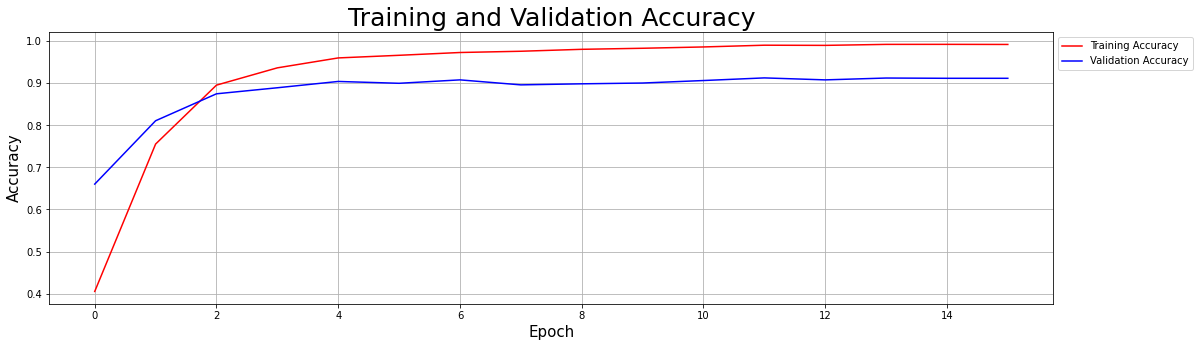

time: 255 ms (started: 2021-06-30 15:36:43 +00:00)


In [37]:
plot_accuracy(history)

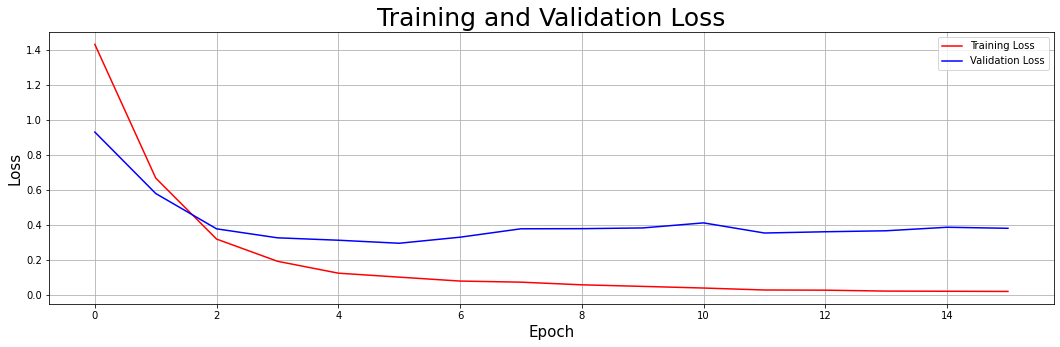

time: 235 ms (started: 2021-06-30 15:36:50 +00:00)


In [38]:
plot_loss(history)

# **Predict Text**